In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## 全サンプルのヒストグラム

In [2]:
df_1 = pd.read_csv(f'./../data/data_FirstStorage/data_mealiness_shake/Mealiness.csv',
                 index_col=0).iloc[:,[0]]

df_2 = pd.read_csv(f'./../data/data_SecondStorage/data_mealiness_shake/Mealiness.csv',
                 index_col=0).iloc[:,[0]]

df = pd.concat([df_1,df_2],axis=0).values

In [3]:
print('サンプルサイズ',len(df))
print('粉質化が10%以下のサンプルサイズ',len(df[df<=10]))

サンプルサイズ 200
粉質化が10%以下のサンプルサイズ 140


/var/folders/19/rctt2t_j609blszmcrd_zd4r0000gn/T/ipykernel_85243/2440134599.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df,


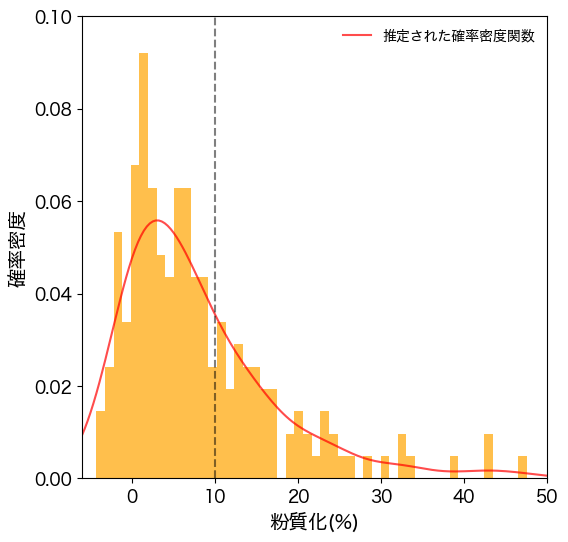

In [4]:
import seaborn as sns


fig = plt.figure(figsize=(6,6))
sns.distplot(df,
            bins=50,
            color='orange',
            hist_kws={'color':'orange','alpha':0.7},
            kde_kws={'color':'r','alpha':0.7,'label':'推定された確率密度関数'}
           )
plt.plot([10,10],[0,1000],c='k',linestyle='dashed',alpha=0.5)
plt.xlim(-6,50)
plt.ylim(0,0.1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('粉質化(%)',fontsize=14)
plt.ylabel('確率密度',fontsize=14)
plt.legend(fontsize=10,frameon=False)
plt.show()

fig.savefig('./../output/図_粉質化指標の分布.png',dpi=400)

## 貯蔵期間ごとのプロット

In [5]:
# FirstStorage
df_1['label'] = [ind[:2] for ind in df_1.index]
data_mean_1 = df_1.groupby(['label']).mean().reset_index().iloc[:,1]
data_std_1 = df_1.groupby(['label']).std().reset_index().iloc[:,1]

# SecondStorage

df_2['label'] = [ind[:2] for ind in df_2.index]
data_mean_2 = df_2.groupby(['label']).mean().reset_index().iloc[:,1]
data_std_2 = df_2.groupby(['label']).std().reset_index().iloc[:,1]

storage = ['week0','week1','week2','week3','week4']
storage = [0,1,2,3,4]

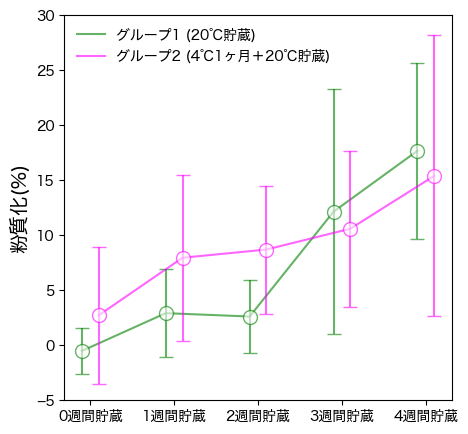

In [6]:
fig = plt.figure(figsize=(5,5))

first_c = 'g'
second_c = 'magenta'
alphaa = 0.6
plt.plot(storage,data_mean_1,c=first_c,label='グループ1 (20℃貯蔵)',alpha=alphaa)
plt.errorbar(storage, data_mean_1, yerr = data_std_1, capsize=5, fmt='o', markersize=10, 
             ecolor=first_c, markeredgecolor = first_c, color='w',alpha=alphaa
             )

plt.plot(np.array(storage)+0.2,data_mean_2,c=second_c,label='グループ2 (4℃1ヶ月＋20℃貯蔵)',alpha=alphaa)
plt.errorbar(np.array(storage)+0.2, data_mean_2, yerr = data_std_2, capsize=5, fmt='o', markersize=10,
             ecolor=second_c, markeredgecolor = second_c, color='w',alpha=alphaa
             )
plt.ylim(-5,30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('粉質化(%)',fontsize=14)
plt.xticks([0.1,1.1,2.1,3.1,4.1],['0週間貯蔵','1週間貯蔵','2週間貯蔵','3週間貯蔵','4週間貯蔵'])
plt.legend(frameon=False)

fig.savefig(f'./../output//図_粉質化経時変化.png',dpi=400)